In [83]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from plot_series_arima import tots, fromts
import warnings
from pyculiarity import detect_ts
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
with open('data/all_apps_df.pkl', 'rb') as f:
    df = pickle.load(f)

In [10]:
num_items = df.groupby(['app'])['item_name'].nunique()

In [21]:
num_items = num_items.sort_values(ascending=False)

In [16]:
with open('steam_capstone/key_to_apps_dict.txt') as f:
    key_to_app = eval(f.read())

### 10 games with the most unique items

In [27]:
for x in num_items.index[:10]:
    print(key_to_app[str(x)])

Team Fortress 2
Dota 2
Counter-Strike: Global Offensive
Unturned
PAYDAY 2
Killing Floor 2
Rust
#monstercakes
Ballistic Overkill
Primal Carnage: Extinction


### Largest estimated economy on Jun 30 2018

In [42]:
tots('Jun 30 2018')

1530334800.0

In [40]:
df.tail()

,app,date,item_name,median_sell_price,quantity
36206520,722670,1.529384e+09,Kaiyuantongbao,0.838,1
36206521,722670,1.529644e+09,Kaiyuantongbao,0.837,1
36206522,722670,1.529989e+09,Kaiyuantongbao,0.609,1
36206523,722670,1.530248e+09,Kaiyuantongbao,0.810,1
36206524,722670,1.530335e+09,Kaiyuantongbao,0.814,1


In [44]:
df[df.date == 1.530335e+09]

,app,date,item_name,median_sell_price,quantity


In [53]:
df.iloc[36206524].date

1530334800.0

# The dates aren't rounded in memory, just in the display

In [60]:
dfjun30 = df[df.date == 1530334800.0]

In [61]:
dfjun30['approx_sale'] = dfjun30['median_sell_price'] * dfjun30['quantity']

/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
jun30_econ = dfjun30.groupby('app')['approx_sale'].sum()

In [64]:
jun30_econ = jun30_econ.sort_values(ascending=False)

In [66]:
jun30_econ.index = [key_to_app[str(x)] for x in jun30_econ.index]

## Approximate total economy of items for each game on Jun 30 2018

In [68]:
jun30_econ[:10]

Counter-Strike: Global Offensive    723276.615
PLAYERUNKNOWN'S BATTLEGROUNDS       343935.066
Dota 2                              302662.021
Team Fortress 2                      69308.164
H1Z1                                 28371.232
Rust                                 22767.461
Black Squad                           8374.062
PAYDAY 2                              7002.922
Killing Floor 2                       6425.348
Unturned                              2481.226
Name: approx_sale, dtype: float64

I'll start doing more work on PUBG, and that will be an easy dataset to work with. CSGO seems like a good one to have been working on. The economy of TF2 drops off and the data would take an incredible amount of time to be put into useable shape. Some items can be different colors or have different effects that are sold under the same item name, but would sell for vastly different prices making the data for those items unuseable. I would have to figure out which items fall under that category and which don't, then find a way to systematically remove those data points.
___

## Approximate total economy of items for each game on Jun 30 2018

In [70]:
dfjun2017 = df[df.date == tots('Jun 30 2017')]

In [71]:
dfjun2017['approx_sale'] = dfjun2017['median_sell_price'] * dfjun2017['quantity']

In [72]:
jun2017_econ = dfjun2017.groupby('app')['approx_sale'].sum()

In [73]:
jun2017_econ = jun2017_econ.sort_values(ascending=False)

In [74]:
jun2017_econ.index = [key_to_app[str(x)] for x in jun2017_econ.index]

In [75]:
jun2017_econ[:10]

Counter-Strike: Global Offensive    1135526.878
Dota 2                               239412.408
Team Fortress 2                       77507.296
PLAYERUNKNOWN'S BATTLEGROUNDS         31627.382
H1Z1                                  23757.082
Rust                                  20628.264
PAYDAY 2                              14229.516
Killing Floor 2                        6238.366
Unturned                               4472.946
Don't Starve Together                  2153.090
Name: approx_sale, dtype: float64

### CSGO econ over time:

In [78]:
with open('data/csgo_df.pkl', 'rb') as f:
    csgodf = pickle.load(f)

In [79]:
csgodf['approx_total'] = csgodf['median_sell_price'] * csgodf['quantity']

In [80]:
csgoecon = csgodf.groupby('date')['approx_total'].sum()

In [90]:
timestamp = csgoecon.index

In [106]:
timestamp = np.array(list(map(int, timestamp)), dtype=np.int64)

In [107]:
model = detect_ts(pd.DataFrame({'timestamp': timestamp, 'value': csgoecon.values}))

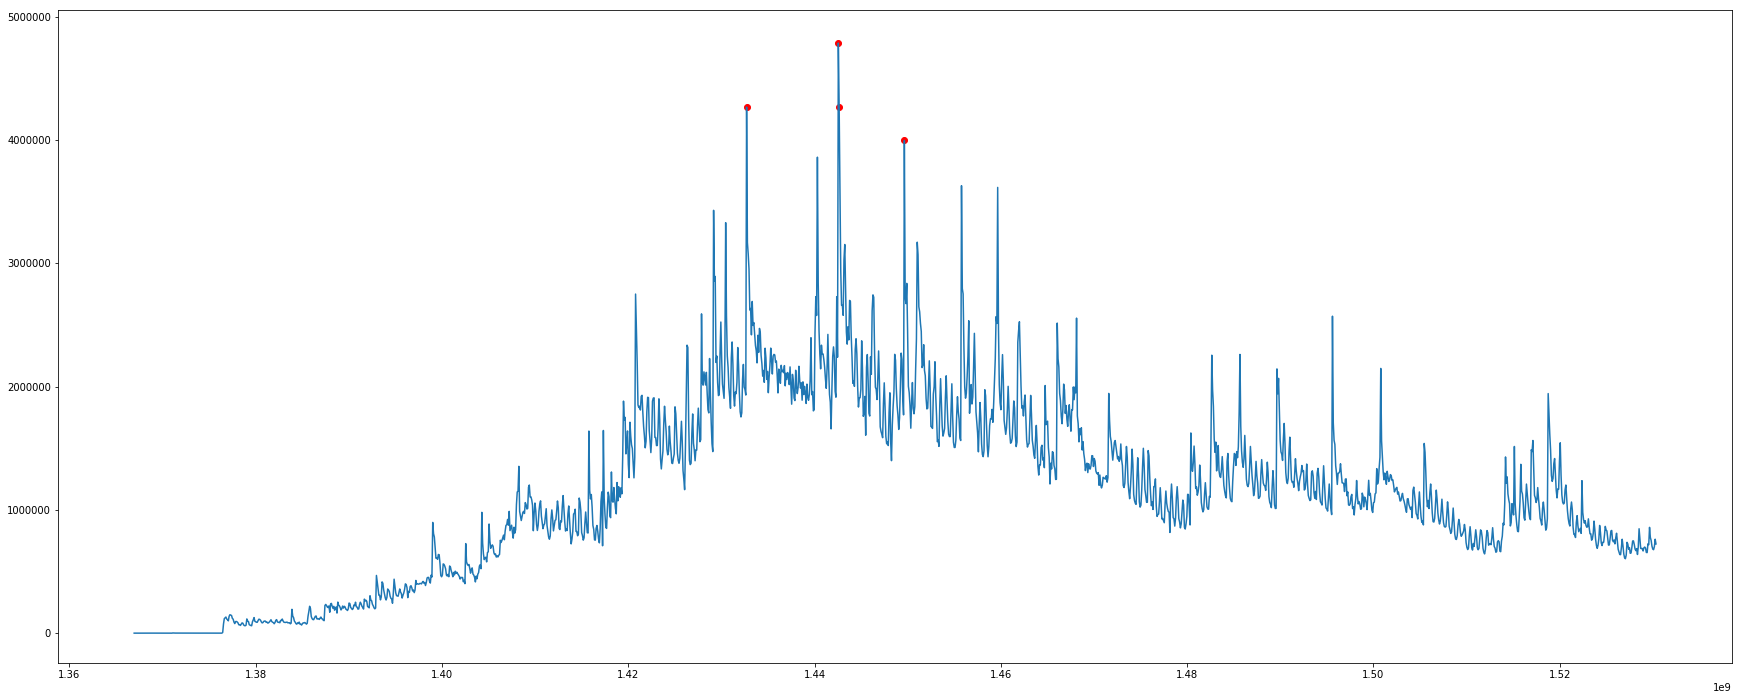

In [117]:
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(csgoecon.index, csgoecon.values)
ax.scatter(model['anoms']['timestamp'], model['anoms']['anoms'], c='r')

In [112]:
model['anoms']

,timestamp,anoms
timestamp,,
1432702800,1432702800,4265683.286
1442552400,1442552400,4784498.777
1442638800,1442638800,4270037.277
1449640800,1449640800,3995210.723
